In [34]:
import torch

In [35]:
torch.version.cuda

'11.8'

In [36]:
device = torch.device('cuda')

In [37]:
import torch
import tqdm as notebook_tqdm
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.linalg import eig

In [38]:
data = pd.read_csv('banknotes.csv')

In [ ]:
data.head()

,conterfeit,Length,Left,Right,Bottom,Top,Diagonal
0,0,214.8,131.0,131.1,9.0,9.7,141.0
1,0,214.6,129.7,129.7,8.1,9.5,141.7
2,0,214.8,129.7,129.7,8.7,9.6,142.2
3,0,214.8,129.7,129.6,7.5,10.4,142.0
4,0,215.0,129.6,129.7,10.4,7.7,141.8


In [39]:
data = data.sample(frac=1).reset_index(drop=True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   conterfeit  200 non-null    int64  
 1   Length      200 non-null    float64
 2   Left        200 non-null    float64
 3   Right       200 non-null    float64
 4   Bottom      200 non-null    float64
 5   Top         200 non-null    float64
 6   Diagonal    200 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 11.1 KB


In [41]:
y = data['conterfeit']
y.head()

0    0
1    1
2    1
3    0
4    0
Name: conterfeit, dtype: int64

In [42]:
X = data.drop('conterfeit',axis=1)
sc = StandardScaler()
x = sc.fit_transform(X)

In [43]:
X.head()

,Length,Left,Right,Bottom,Top,Diagonal
0,214.6,129.8,129.4,7.4,10.6,141.0
1,214.6,130.2,130.4,10.5,11.8,139.7
2,214.8,129.9,129.8,9.6,12.0,139.6
3,215.2,129.9,129.7,7.2,10.6,142.1
4,215.1,130.0,130.0,7.4,10.5,141.8


In [44]:
x

array([[-0.78804829, -0.89275337, -1.3806861 , -1.40008195, -0.06305117,
         0.44937213],
       [-0.78804829,  0.21798177,  1.10033115,  0.75122117,  1.4351944 ,
        -0.68167099],
       [-0.25558323, -0.61506959, -0.3882792 ,  0.1266493 ,  1.68490199,
        -0.76867431],
       ...,
       [-0.52181576, -0.3373858 , -1.3806861 ,  0.54303055,  0.43636402,
        -1.11668758],
       [ 1.34181195,  1.05103313,  1.5965346 , -0.4285257 ,  0.43636402,
        -1.63870748],
       [-0.25558323, -0.05970201, -0.88448265, -0.4285257 , -0.93702775,
         0.36236882]])

In [45]:
PyData = torch.tensor(x,dtype = torch.float32)
PyY = torch.tensor(y)

In [46]:
PyData.device, PyY.device

(device(type='cpu'), device(type='cpu'))

In [47]:
PyData = PyData.to(device)
PyY = PyY.to(device)

In [48]:
PyData.device, PyY.device

(device(type='cuda', index=0), device(type='cuda', index=0))

In [ ]:
# PyData_mean = torch.mean(PyData, dim=0)
# PyData_centered = PyData - PyData_mean

In [49]:
pca = torch.pca_lowrank(PyData)

In [50]:
pca

(tensor([[-0.0782, -0.0497,  0.0732, -0.0268,  0.0663, -0.0243],
         [ 0.0747, -0.0506,  0.0453, -0.0299, -0.1003,  0.0363],
         [ 0.0237, -0.0572,  0.1098,  0.0845, -0.0377,  0.0389],
         ...,
         [ 0.0044, -0.0863,  0.0266,  0.1194,  0.1132,  0.0205],
         [ 0.0846,  0.0927,  0.0378,  0.0197,  0.0227, -0.2175],
         [-0.0476, -0.0096, -0.0317, -0.0170,  0.0948, -0.0102]],
        device='cuda:0'),
 tensor([24.2716, 15.9880, 13.1836,  9.4844,  7.3304,  6.1462], device='cuda:0'),
 tensor([[-0.0070,  0.8155,  0.0177,  0.5746, -0.0588, -0.0311],
         [ 0.4678,  0.3420, -0.1034, -0.3949,  0.6395,  0.2977],
         [ 0.4867,  0.2525, -0.1235, -0.4303, -0.6141, -0.3492],
         [ 0.4068, -0.2662, -0.5835,  0.4037, -0.2155,  0.4624],
         [ 0.3679, -0.0915,  0.7876,  0.1102, -0.2198,  0.4190],
         [-0.4935,  0.2739, -0.1139, -0.3919, -0.3402,  0.6318]],
        device='cuda:0'))

In [51]:
pca_x = pca[0][:,:5]

In [53]:
classes = ['Not Counterfiet','Counterfiet']

# Simple Classifier

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pca_x,y,test_size=0.20)

In [57]:
X_train

tensor([[-1.1172e-01, -7.2223e-02,  5.0533e-02,  2.4095e-02,  2.8193e-02],
        [-7.1243e-02,  2.8740e-02,  1.3842e-01,  6.5650e-02, -9.0421e-02],
        [-1.1457e-01, -7.4138e-03,  1.4811e-02,  6.7514e-02,  1.0434e-03],
        [-2.4306e-02,  4.3473e-02,  9.2758e-02, -1.0180e-01,  3.4439e-02],
        [ 6.0416e-02,  4.5780e-02, -1.5478e-02, -6.3388e-02, -8.0279e-02],
        [ 5.3429e-02, -6.6042e-02, -2.1743e-01,  2.4810e-02,  4.1870e-02],
        [-8.3975e-02, -1.9670e-02,  7.4506e-02,  3.1122e-02, -1.6699e-01],
        [-8.0571e-03,  7.9594e-02,  5.8572e-02, -3.3290e-02,  1.2252e-01],
        [-9.6631e-02,  6.4695e-02,  5.8947e-03,  4.4630e-02,  4.7468e-02],
        [ 5.4053e-02,  6.2458e-02,  1.0359e-01, -5.2259e-03,  3.8504e-02],
        [-8.0678e-02, -8.0708e-02,  3.0029e-02, -5.2600e-02,  1.6478e-02],
        [ 6.3344e-02, -1.1161e-01, -3.7397e-02,  8.3923e-02,  3.2442e-02],
        [-1.0530e-01, -1.0389e-01,  1.5168e-02, -4.8511e-02, -3.5650e-02],
        [ 4.6784e-02,  8.

In [58]:
y_pred = []

In [59]:
for test in X_test:
  MIN_DIST = 999999
  classVal = 0
  for train in X_train:
    dist = torch.norm(train - test)
    if dist < MIN_DIST:
      MIN_DIST = dist
      for t, y in zip(X_train, y_train):
        comparison = t == train
        equal_arrays = comparison.all()
        if equal_arrays:
          classVal = y
          break
  y_pred.append(classVal)

In [60]:
y_pred,y_test

([1,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  0],
 107    1
 132    1
 93     0
 194    1
 31     0
 121    1
 42     0
 103    0
 59     0
 62     1
 167    1
 162    1
 129    0
 199    0
 37     0
 66     1
 55     1
 182    0
 41     0
 193    1
 70     1
 159    1
 19     0
 83     1
 186    0
 63     0
 154    1
 84     0
 69     0
 138    0
 28     1
 146    0
 196    1
 80     1
 81     0
 189    1
 95     1
 74     0
 180    0
 27     0
 Name: conterfeit, dtype: int64)

In [61]:
cf_matrix = confusion_matrix(y_test, y_pred)
cf_matrix

array([[19,  2],
       [ 0, 19]])

<Axes: >

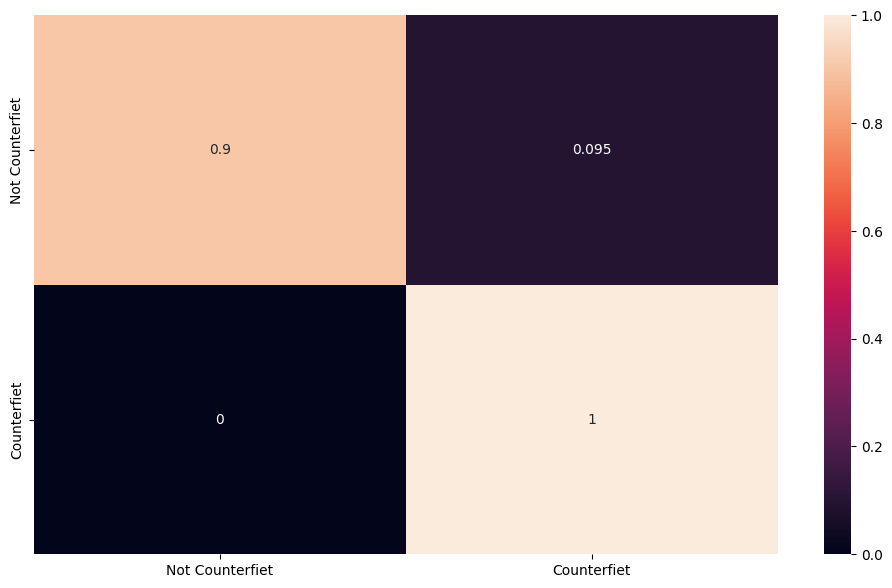

In [62]:
classes = ['Not Counterfiet','Counterfiet']
df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True)